## Exploratory Data Analysis Census Income Data Set 

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/census.csv")
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The datasets contains 32561 and 15 columns

In [3]:
print(df.shape)

(32561, 15)


Some processing to the name of the columns

In [4]:
df.columns

Index(['age', ' workclass', ' fnlgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [5]:
def column_processing(column):
    column = column.replace(" ", "")
    column = column.replace("-", "_")
    return column
    
new_columns = map(column_processing, df.columns)
new_columns = list(new_columns)
print(new_columns)

['age', 'workclass', 'fnlgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']


In [6]:
df.columns = new_columns

Exploring the column data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


I'm going to rename some columns to make them more clear:

In [8]:
df.rename(
    columns={
        "fnlgt":"final_weight",
        "education_num":"user_education_id",
    }, 
    inplace=True
)

Checking for null values

In [9]:
df.isnull().sum()

age                  0
workclass            0
final_weight         0
education            0
user_education_id    0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

According to this report, there are no null values in the dataframe. This doesn't mean all the values in the rows are valid, let's explore the content of this dataset.

Exploring unbalanced target variable

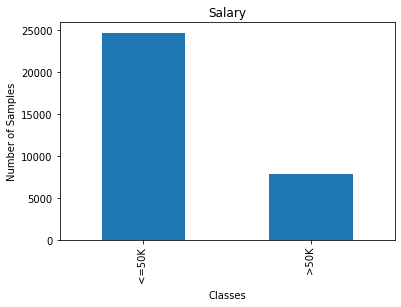

In [10]:
df.salary.value_counts().plot(kind="bar", title="Salary")
plt.xlabel("Classes")
plt.ylabel("Number of Samples");

There are more records of people who earn less than 50k. Now I'll check the distribution of predictors

In [11]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

I found out that there is a white space at the beginning of some records, this is not a huge problem but I can easily remove it using pandas so I can query the data later easily:

In [12]:
df.replace(' ', '', regex=True, inplace=True)
df.salary.unique()

array(['<=50K', '>50K'], dtype=object)

I can proceed analyzing the distribution of the numerical values:

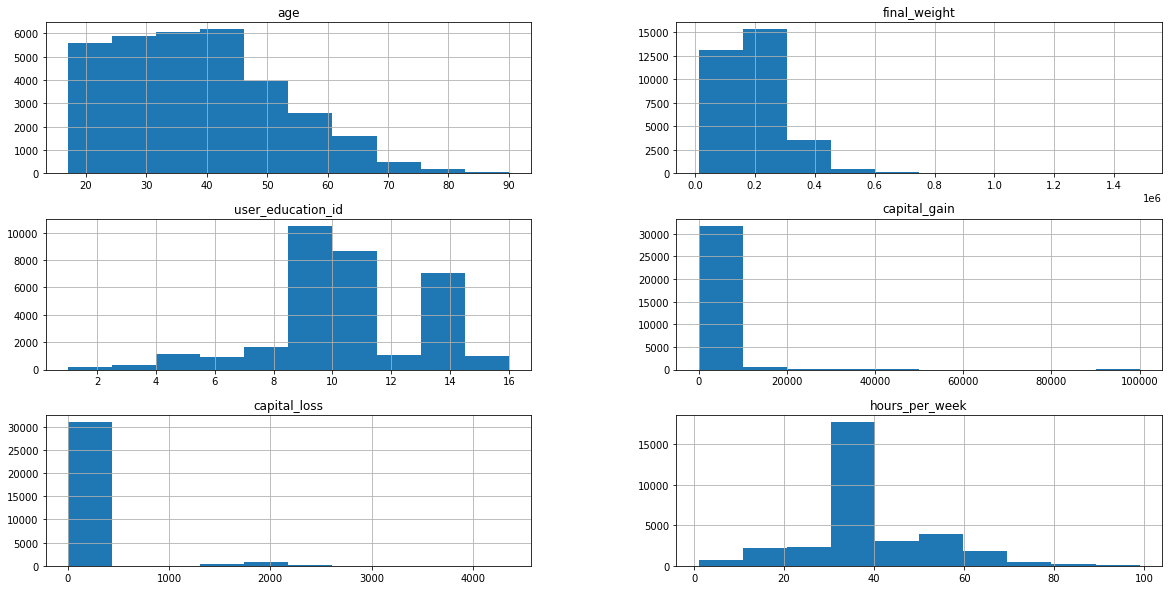

In [17]:
df.hist(figsize=(20, 10));

In [18]:
df.describe()

,age,final_weight,user_education_id,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

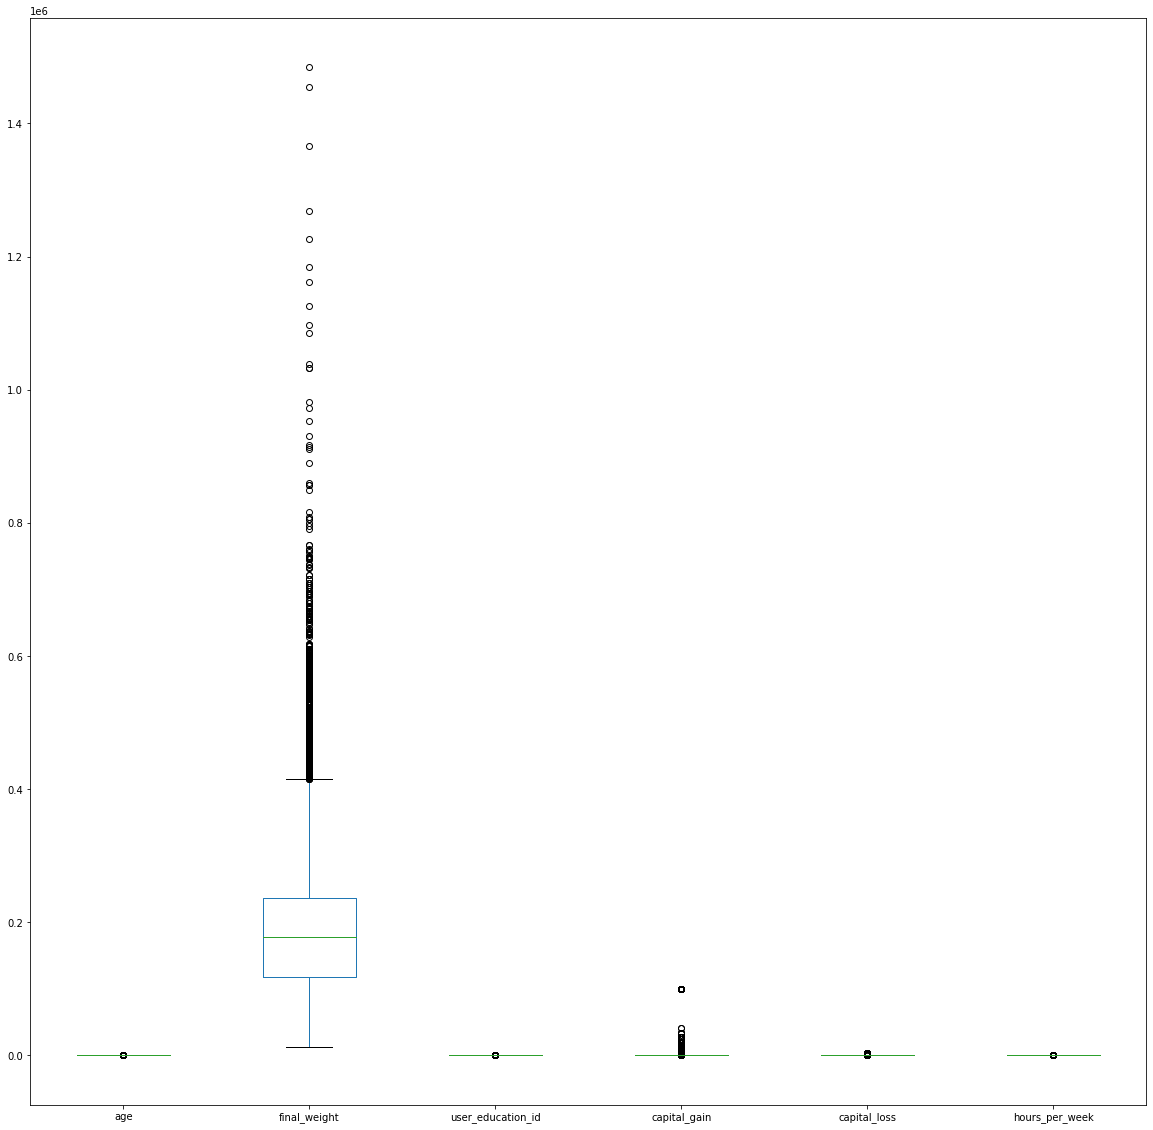

In [20]:
df.plot(kind="box", figsize=(20, 20))

Capital Loss and Capital Gain seem to have a skewed

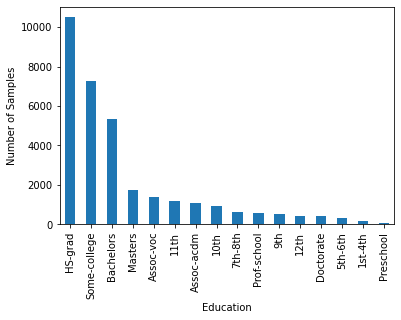

In [26]:
df.education.value_counts().plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Number of Samples");

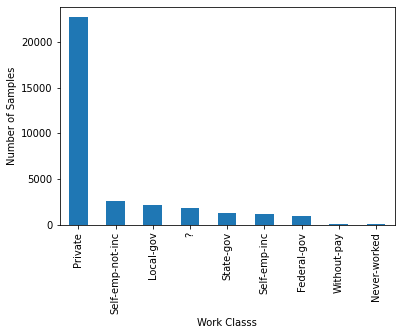

In [31]:
df.workclass.value_counts().plot(kind="bar")
plt.xlabel("Work Classs")
plt.ylabel("Number of Samples");

There are missing values in the workclass column with ' ?'

In [32]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Let's check how many of them:

I need to figure out if there are more values like this in the dataframe, replaciong the question mark by a NaN value will help me find out how many of out are there in other columns of the dataframe.

In [45]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

age                     0
workclass               0
final_weight            0
education               0
user_education_id       0
marital_status          0
occupation           1843
relationship            0
race                    0
sex                     0
capital_gain            0
capital_loss            0
hours_per_week          0
native_country        583
salary                  0
dtype: int64

I need to find out how significant are these values, visualizing the percentage of missing values will help

In [47]:
length_df = len(df)
df.isnull().sum() / length_df * 100

age                  0.000000
workclass            0.000000
final_weight         0.000000
education            0.000000
user_education_id    0.000000
marital_status       0.000000
occupation           5.660146
relationship         0.000000
race                 0.000000
sex                  0.000000
capital_gain         0.000000
capital_loss         0.000000
hours_per_week       0.000000
native_country       1.790486
salary               0.000000
dtype: float64

Values are not very high and I don't want to add noise to my predictions by doing replacing those values with the most frequent, let's just drop them.

In [49]:
df.dropna(inplace=True)
print(f"New shape: {df.shape}")

New shape: (30162, 15)


Let's keep exploring! 

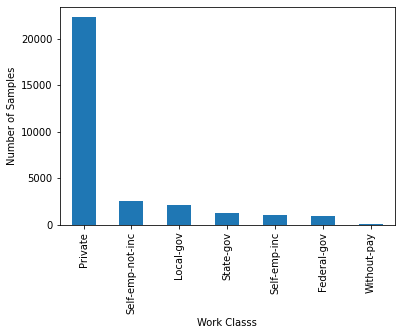

In [50]:
df.workclass.value_counts().plot(kind="bar")
plt.xlabel("Work Classs")
plt.ylabel("Number of Samples");

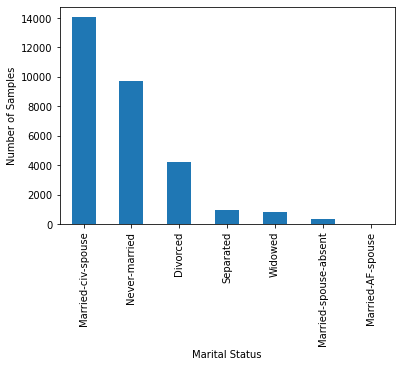

In [51]:
df.marital_status.value_counts().plot(kind="bar")
plt.xlabel("Marital Status")
plt.ylabel("Number of Samples");

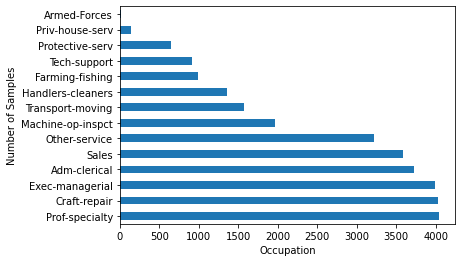

In [52]:
df.occupation.value_counts().plot(kind="barh")
plt.xlabel("Occupation")
plt.ylabel("Number of Samples");

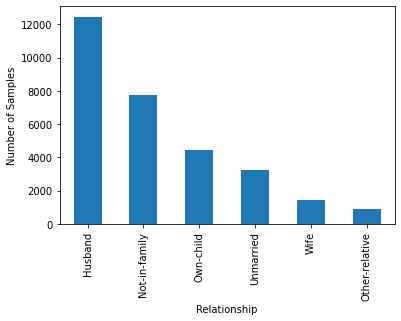

In [53]:
df.relationship.value_counts().plot(kind="bar")
plt.xlabel("Relationship")
plt.ylabel("Number of Samples");

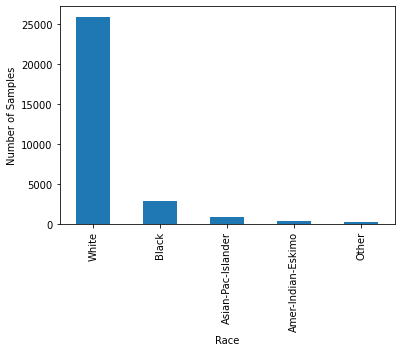

In [54]:
df.race.value_counts().plot(kind="bar")
plt.xlabel("Race")
plt.ylabel("Number of Samples");

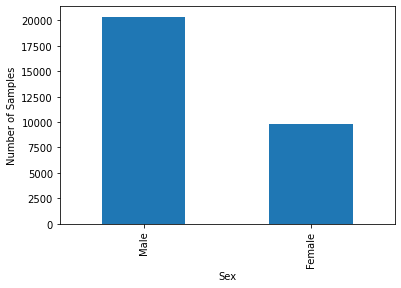

In [55]:
df.sex.value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Number of Samples");

In [56]:
df.native_country.value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Taiwan                           42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

Visualizing the correlation between variables will certainly help which of them will be more important in the analysis.

<AxesSubplot:>

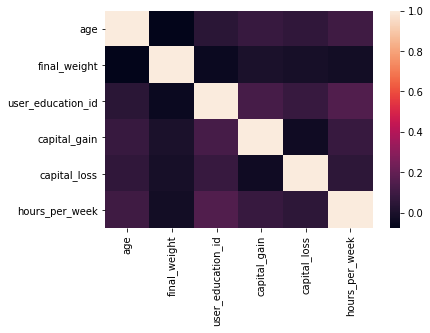

In [61]:
import seaborn as sns
sns.heatmap(
    df.corr(), 
    xticklabels=df.corr().columns, 
    yticklabels=df.corr().columns
)

It's not very clear. 
Finally, I'll just replace the salary values for 1 to the people who earn more than 50K, 0 if they don't.

In [65]:
df.salary.replace(
    {
        "<=50K": 0,
        ">50K":1
    },
    inplace=True
)
df.salary.unique()

array([0, 1])

<AxesSubplot:>

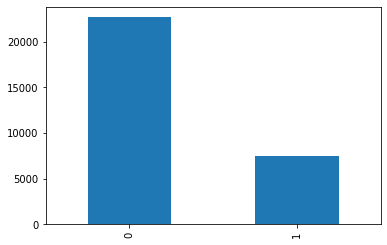

In [66]:
df.salary.value_counts().plot(kind="bar")

Saving the new cleaned dataset:

In [67]:
df.to_csv("../data/clean_data.csv", index=False)

In [68]:
new_df = pd.read_csv("../data/clean_data.csv")

In [69]:
new_df.head()

,age,workclass,final_weight,education,user_education_id,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
